# Project 1:

## Setup

For this project, we will more rigorously explore data visualization and data manipulation with the School System Finances dataset.

In [1]:
# removes the need to call plt.show() every time
%matplotlib inline

In [2]:
import missingno as msno
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

## Getting to know the dataset

First we load the `elsec15` dataset. The original dataset consisted of 2 separate sheets. The second sheet provided no useful data to process. It had three rows and 3 columns describing the date that the file was created. Therefore, we deleted the sheet. 

In [7]:
school = pd.read_csv("elsec15.csv")
school.shape

/home/porrster/home/porrster/Documents/anaconda2/envs/universe/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(14376, 141)

We will now obtain a quick overview and some statistics on the dataset.

In [11]:
school.describe()

,STATE,IDCENSUS,CONUM,SCHLEV,YRDATA,V33,TOTALREV,TFEDREV,C14,C15,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
count,14376.000000,1.437600e+04,14376.000000,14376.000000,14376.0,14376.000000,1.437600e+04,1.437600e+04,14376.000000,14376.000000,...,14376.000000,1.437600e+04,1.437600e+04,14376.000000,1.437600e+04,14376.000000,14376.000000,14376.000000,14376.000000,1.437600e+04
mean,26.801336,2.728090e+13,29838.158598,2.883139,15.0,3374.682526,4.546951e+04,3.708038e+03,915.914858,752.781093,...,7.318656,2.871850e+04,4.831726e+03,3936.853158,2.957606e+04,487.162354,553.761547,1335.636825,3710.651920,9.091542e+03
std,13.894331,1.389514e+13,14753.492121,1.271649,0.0,14419.737037,2.590623e+05,2.021328e+04,5972.748111,3619.184513,...,122.649299,1.841763e+05,2.652979e+04,20071.591744,1.894224e+05,3555.988118,6968.740454,10651.097318,20183.852905,3.261580e+04
min,1.000000,1.500100e+12,1001.000000,1.000000,15.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,15.000000,1.550327e+13,18063.000000,3.000000,15.0,305.000000,5.241500e+03,2.920000e+02,54.000000,0.000000,...,0.000000,8.400000e+01,0.000000e+00,5.000000,7.150000e+01,0.000000,0.000000,0.000000,0.000000,8.350000e+02
50%,27.000000,2.750320e+13,30063.000000,3.000000,15.0,979.500000,1.402300e+04,8.470000e+02,180.000000,118.000000,...,0.000000,4.034000e+03,0.000000e+00,410.000000,4.143500e+03,0.000000,0.000000,0.000000,0.000000,2.708500e+03
75%,38.000000,3.850053e+13,41009.000000,3.000000,15.0,2744.250000,3.791375e+04,2.433500e+03,545.250000,532.000000,...,0.000000,1.866350e+04,3.030000e+02,1845.000000,1.912600e+04,0.000000,0.000000,491.000000,626.250000,7.567500e+03
max,51.000000,5.150230e+13,56045.000000,7.000000,15.0,995192.000000,2.543738e+07,1.307783e+06,379531.000000,248209.000000,...,7753.000000,1.372802e+07,1.312286e+06,731854.000000,1.447108e+07,173300.000000,700000.000000,869643.000000,885058.000000,2.355662e+06


Now that we have an overview of our dataset, we will move on by cleaning it.

In [4]:
school_clean = school[['STATE', 'IDCENSUS', 'NAME', 'SCHLEV', 'NCESID', 'YRDATA', 'TOTALREV', 'TFEDREV', 'TSTREV',
                       'TLOCREV', 'TOTALEXP', 'TCURELSC', 'TCURINST', 'TCURSSVC', 'TCUROTH', 'NONELSEC', 'TCAPOUT']]
school_clean.head()

,STATE,IDCENSUS,NAME,SCHLEV,NCESID,YRDATA,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURELSC,TCURINST,TCURSSVC,TCUROTH,NONELSEC,TCAPOUT
0,1,1500100100000,AUTAUGA COUNTY SCHOOL DISTRICT,3,0100240,15,79665,7574,53244,18847,76069,72872,44085,23217,5570,1010,691
1,1,1500200100000,BALDWIN COUNTY SCHOOL DISTRICT,3,0100270,15,330317,23602,143282,163433,297083,269928,155668,99682,14578,4957,13256
2,1,1500300100000,BARBOUR COUNTY SCHOOL DISTRICT,3,0100300,15,10519,2518,5632,2369,10314,9957,5249,3835,873,145,0
3,1,1500300200000,EUFAULA CITY SCHOOL DISTRICT,3,0101410,15,26076,3374,16048,6654,25602,24232,14887,7494,1851,333,990
4,1,1500400100000,BIBB COUNTY SCHOOL DISTRICT,3,0100360,15,31825,3586,21687,6552,31293,29133,16019,10822,2292,658,858


We now check for any columns with missing values:

In [6]:
[col for col in school_clean.columns if school_clean[col].isnull().any()]
print(school_clean.shape)

(14376, 17)


Since the code above returned an empty list, we now know that the school_clean dataframe has no columns with missing values. In other words, we have a complete dataframe.

## Intro to Seaborn

There are 2 types of data in any dataset: categorial and numerical data. We will first explore categorical data.

One really easy way to show categorical data is through bar plots. Let's explore how to make some in seaborn.
We want to investigate the difference in rates at which males vs females survived the accident. Using the [documentation here](https://seaborn.pydata.org/generated/seaborn.barplot.html) and [example here](http://seaborn.pydata.org/examples/color_palettes.html), create a `barplot` to depict this. It should be a really simple one-liner.

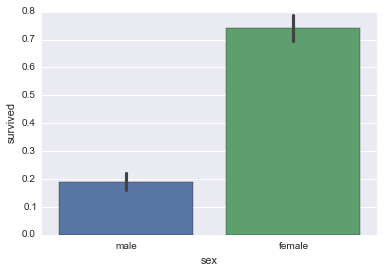

In [39]:
sns.barplot(x="sex", y="survived", data=titanic)

Notice how it was so easy to create the plot! You simply passed in the entire dataset, and just specified the `x` and `y` fields that you wanted exposed for the barplot. Behind the scenes seaborn ignored `NaN` values for you and automatically calculated the survival rate to plot. Also, that black tick is a 95% confidence interval that seaborn plots.

So we see that females were much more likely to make it out alive. What other factors do you think could have an impact on surival rate? Plot a couple more barplots below. Make sure to use *categorical* values like `sex` used above, not something numerical like age or fare.

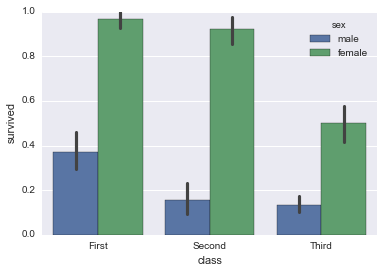

In [40]:
sns.barplot(x= "class", y= "survived", hue= "sex", data= titanic)

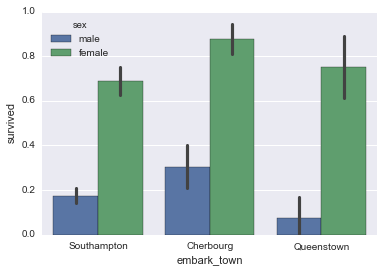

In [41]:
sns.barplot(x= "embark_town", y= "survived", hue="sex", data= titanic)

What if we wanted to add a further sex breakdown for the categories chosen above? Go back and add a `hue` parameter for `sex` for the couple plots you just created, and seaborn will split each bar into a male/female comparison.

Now we want to compare the embarking town vs the age of the individuals. We don't simply want to use a barplot, since that will just give the average age; rather, we would like more insight into the relative and numeric *distribution* of ages.

A good tool to help us here is [`swarmplot`](https://seaborn.pydata.org/generated/seaborn.swarmplot.html). Use this function to view `embark_town` vs `age`, again using `sex` as the `hue`.

/Users/Aakarsh/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


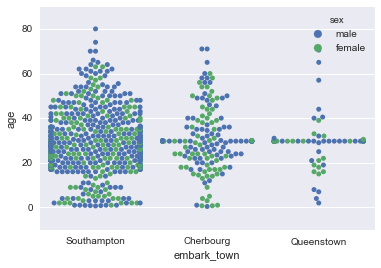

In [42]:
sns.swarmplot(x="embark_town", y="age", hue="sex", data=titanic)

Cool! This gives us much more information. What if we didn't care about the number of individuals in each category at all, but rather just wanted to see the *distribution* in each category? [`violinplot`](https://seaborn.pydata.org/generated/seaborn.violinplot.html) plots a density distribution. Plot that.

/Users/Aakarsh/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


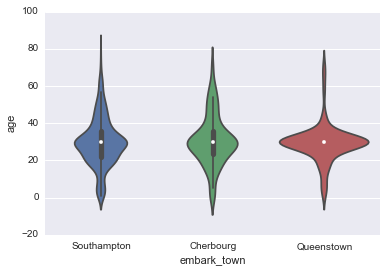

In [43]:
#sns.violinplot(x="embark_town", y="age", data=titanic)
sns.violinplot(x="embark_town", y="age", split=True, data=titanic)

Go back and clean up the violinplot by adding `split='True'` parameter. 

Now take a few seconds to look at the graphs you've created of this data. What are some observations? Jot a couple down here.

All of the graphs show a spread along the 20-40 age group, which implies a lot of the survivors on the titanic were in this age group. The spread of the graphs represents the density of the points in that region. In the scatter plot for Queenstown, we see a very sparsely populated plot, which can also be seen in the thinning of the Queenstown violin plot. 

As I mentioned, data is categorical or numeric. We already started getting into numerical data with the swarmplot and violinplot. We will now explore a couple more examples.

Let's look at the distribution of ages. Use [`displot`](https://seaborn.pydata.org/generated/seaborn.distplot.html) to make a histogram of just the ages.

/Users/Aakarsh/anaconda3/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


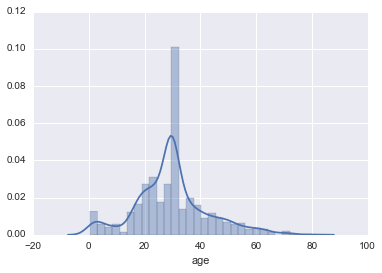

In [44]:
sns.distplot(titanic.age)

A histogram can nicely represent numerical data by breaking up numerical ranges into chunks so that it is easier to visualize. As you might notice, seaborn also automatically plots a gaussian kernel density estimate.

Do the same thing for fares - do you notice something odd about that histogram? What does that skew mean?

/Users/Aakarsh/anaconda3/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


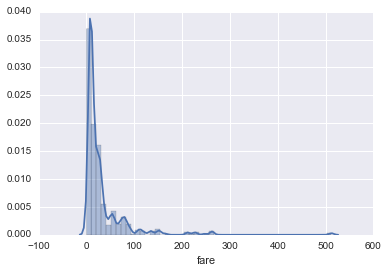

In [45]:
sns.distplot(titanic.fare)

Now, using the [`jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot) function, make a scatterplot of the `age` and `fare` variables to see if there is any relationship between the two.

/Users/Aakarsh/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


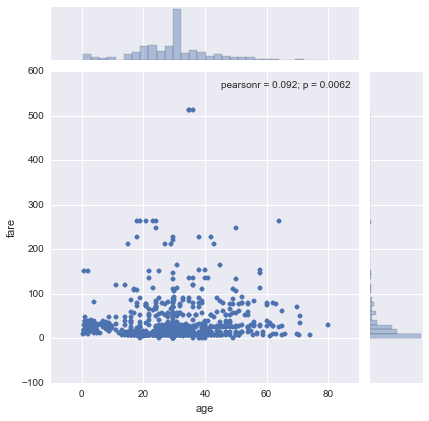

In [46]:
sns.jointplot(titanic.age, titanic.fare)

Scatterplots allow one to easily see trends/coorelations in data. As you can see here, there seems to be very little correlation. Also observe that seaborn automatically plots histograms.

## Diving into a familiar dataset

Now you hopefully have a pretty good understanding of both seaborn and matplotlib. You will now apply your learned skills to a familiar dataset, the 2016 election contributions. Navigate [here](http://classic.fec.gov/disclosurep/PDownload.do) and download ALL.zip. 

There will be no hand-holding in this section. You know how to import a dataset, pull out and clean the values you need, and then plot it. You will follow this whole pipeline yourself. 

Please plot 2 graphs:
* the first graph should show the *cumulative* contributions for the candidate of your choice
* the second graph should be a histogram of the contributions (not cumulative), with a bin for each month

You may use whatever outside libraries you wish. The [`tsplot`](http://seaborn.pydata.org/generated/seaborn.tsplot.html) and [`distplot`](http://seaborn.pydata.org/generated/seaborn.distplot.html) from seaborn might be useful. The [`hist`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html) from matplotlib and [`cumsum`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html) from numpy may also be useful.

In [17]:
import datetime as dt
import matplotlib.pyplot as plt
from collections import defaultdict
import matplotlib.dates as mdates

In [18]:
contributions = pd.read_csv('2016-donations.csv', index_col=False)

/Users/Aakarsh/anaconda3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (6,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
trump_conts = contributions[contributions.cand_nm == 'Trump, Donald J.']
trump_conts_clean = trump_conts[['cand_nm', 'contb_receipt_dt', 'contb_receipt_amt']]
trump_conts_clean

,cand_nm,contb_receipt_dt,contb_receipt_amt
6588686,"Trump, Donald J.",08-MAY-16,100.00
6588687,"Trump, Donald J.",10-MAR-16,48.75
6588688,"Trump, Donald J.",03-MAR-16,300.00
6588689,"Trump, Donald J.",11-JUL-16,28.00
6588690,"Trump, Donald J.",25-NOV-16,100.25
6588691,"Trump, Donald J.",27-NOV-16,89.07
6588692,"Trump, Donald J.",12-NOV-16,164.61
6588693,"Trump, Donald J.",25-NOV-16,124.91
6588694,"Trump, Donald J.",19-JUL-16,80.00
6588695,"Trump, Donald J.",19-JUL-16,40.00


In [27]:
def to_donation_xy_points(a):
    donations_dict = defaultdict(lambda:0)
    for index, row in a.iterrows():
        date = dt.datetime.strptime(row.contb_receipt_dt, '%d-%b-%y')
        donations_dict[date] += row.contb_receipt_amt
    sorted_by_date = sorted(donations_dict.items())
    return zip(*sorted_by_date)